In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from PIL import Image



from keras.models import Sequential
from keras.layers import Dense,Input

from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [4]:
data = fashion_mnist.load_data()
data 

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(x_train, y_train), (x_test, y_test) = data
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

1


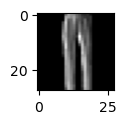

In [6]:
P = 2564
plt.figure(figsize=(1,1))
plt.imshow(x_train[P],cmap='gray');
print(y_train[P])

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
y_train_on = to_categorical(y_train)
y_test_on = to_categorical(y_test)
y_train_on , y_test_on

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [9]:
x_train_vec = x_train.reshape(60000,-1)/255
x_test_vec = x_test.reshape(10000,-1)/255

In [10]:
print(x_train_vec.max(), x_train_vec.min())

1.0 0.0


In [11]:
(x_train_vec.shape[1]+(len(np.unique(y_train))))/2

397.0

In [12]:
model = Sequential()

model.add(Input(shape=(x_train_vec.shape[1],)))

# لایه اول
model.add(Dense(x_train_vec.shape[1],activation='relu'))

# لایه هیدن
model.add(Dense(256,activation='relu'))

# لایه اخر
model.add(Dense(len(np.unique(y_train)),activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
res = model.fit(x_train_vec,y_train_on,epochs=2,validation_data=(x_test_vec,y_test_on))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7896 - loss: 0.5777 - val_accuracy: 0.8361 - val_loss: 0.4256
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8659 - loss: 0.3604 - val_accuracy: 0.8708 - val_loss: 0.3606


In [15]:
np.random.uniform(1,255,(8*8))

array([254.77142652, 210.08849627, 190.15339197,  79.0806716 ,
        24.76463777, 213.85664521, 165.03190396, 183.71052265,
       240.40726761,  72.13954623,  73.73858484,  62.00909576,
       134.72851602, 164.75704554,   8.72668294,   2.20131154,
        85.90125791, 147.53316257,  74.60246929,  98.19540628,
        82.18217583,  10.58947698, 213.03289611, 187.44808125,
       143.37099032, 185.69059189, 198.72388082,   1.08796836,
        34.29052215, 126.73670953,  86.57535954, 101.07903996,
       232.0082676 , 205.44351223,  60.98761106, 227.22725115,
       124.16780075, 164.01854463, 145.98243952,  39.65459838,
        33.06259352, 117.02072065,   3.51455531, 233.68958054,
       142.51426511, 189.59046052, 223.88686211,  10.54311511,
       170.12176191,  77.47575845, 162.55167741, 246.73406298,
        44.50952263,  65.95965719, 224.40701414, 219.31401142,
        76.28397856, 191.34343812,  74.89158656, 247.88007274,
       218.2551706 , 227.74222058, 143.06875835,  17.35

In [16]:
np.random.uniform(1,255,(8*8))

array([114.01984653, 202.49031888,  70.87121901, 129.02784049,
       202.3914761 , 105.7392605 ,  93.27309307,  96.30247906,
        85.16762036,  24.63367596,  72.28562375,  10.52380894,
       174.40248375,  21.52273111, 138.54243148,  54.60122933,
        83.47018531,  49.91075717,   6.65724392, 243.43604514,
       236.37320333, 175.23536387, 128.41110228, 117.06587358,
       203.18088226, 180.94943385, 110.47310578,  47.89248378,
       227.72095883, 178.13551443,  45.7238828 , 118.2245827 ,
        74.46576907, 212.62879116, 159.77375001, 124.92534866,
       164.66088372, 244.04808591, 126.06144756,  88.01100088,
        78.07185259,  20.30594416,  80.2583851 ,  15.56363563,
        25.66824228, 251.91551453,  18.40901542, 165.86263048,
       145.37354272,  46.74498124,   4.45754457, 225.81636996,
       229.99365248,  93.77981645,  21.250868  , 240.48637361,
       238.14602681, 107.31140946, 182.26296761, 122.27445295,
        43.10298822, 211.08739519,  44.88957516, 246.96

In [135]:
pe = 777

In [136]:
model.predict(x_test_vec[pe].reshape(1,-1)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


1

In [137]:
y_test_on[pe].argmax()

1

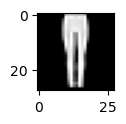

In [138]:
ss = x_test_vec[pe].reshape(28,28)
plt.figure(figsize=(1,1))
plt.imshow(ss,'gray')

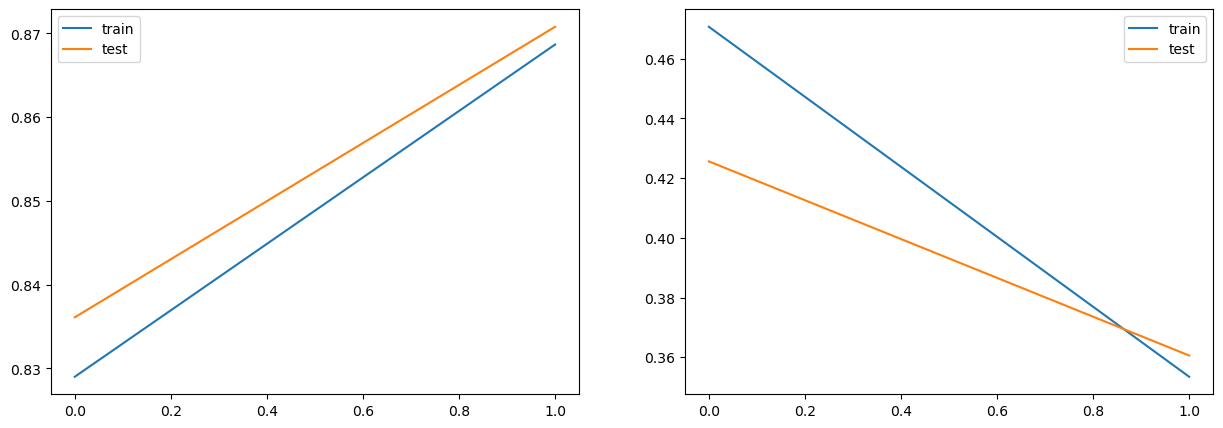

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test']);

In [21]:
model.save('model_13.keras')